In [30]:
import pandas as pd

df = pd.read_csv("my_dota_stats.csv")

In [31]:
df.columns

Index(['match_id', 'date', 'hero_id', 'won', 'team', 'duration_minutes',
       'game_mode', 'kills', 'deaths', 'assists', 'kda', 'level',
       'gold_per_min', 'xp_per_min', 'net_worth', 'last_hits', 'denies',
       'hero_damage', 'tower_damage', 'hero_healing', 'lane_efficiency',
       'teamfight_participation', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'hero_name'],
      dtype='str')

In [32]:
df = df[['hero_name', 'date', 'team', 'won', 'kills', 'deaths', 'assists', 'last_hits', 'denies', 'duration_minutes', 'gold_per_min', 'xp_per_min', 'hero_damage','tower_damage', 'hero_healing']]
df_numerical = df[['kills', 'deaths', 'assists', 'last_hits', 'denies', 'duration_minutes', 'gold_per_min', 'xp_per_min', 'hero_damage','tower_damage', 'hero_healing']]

In [4]:
df.head()

,hero_name,team,won,kills,deaths,assists,last_hits,denies,duration_minutes,gold_per_min,xp_per_min,hero_damage,tower_damage,hero_healing
0,Puck,Radiant,False,12,7,8,251,9,42.8,574,909,49922,652,0
1,Enigma,Radiant,False,7,8,18,242,19,49.6,465,618,58265,4377,3361
2,Invoker,Dire,False,9,7,26,245,23,51.5,531,608,51051,2332,0
3,Puck,Radiant,False,9,7,10,291,9,43.8,507,782,39642,1233,0
4,Nature's Prophet,Radiant,True,6,3,18,191,12,27.9,618,581,17770,9460,1033


In [5]:
df_numerical.describe()

,kills,deaths,assists,last_hits,denies,duration_minutes,gold_per_min,xp_per_min,hero_damage,tower_damage,hero_healing
count,199.000000,199.000000,199.000000,199.000000,199.00000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,8.974874,8.557789,18.286432,198.100503,9.20603,44.975377,476.306533,692.683417,33039.492462,2674.889447,607.115578
std,5.511638,3.582424,8.608979,122.977209,6.67823,10.134482,132.693356,228.147979,16420.912312,3570.445177,1868.626872
min,0.000000,0.000000,0.000000,9.000000,0.00000,24.400000,130.000000,186.000000,3205.000000,0.000000,0.000000
25%,5.000000,6.000000,12.000000,107.500000,4.00000,38.200000,387.500000,550.000000,20185.000000,235.000000,0.000000
50%,9.000000,8.000000,18.000000,190.000000,8.00000,43.500000,462.000000,668.000000,30022.000000,1190.000000,0.000000
75%,12.000000,11.000000,23.500000,261.000000,12.00000,51.300000,559.000000,852.500000,44292.500000,3327.500000,0.000000
max,25.000000,20.000000,51.000000,796.000000,33.00000,88.200000,883.000000,1378.000000,86394.000000,19962.000000,19849.000000


In [6]:
df.dtypes

hero_name               str
team                    str
won                    bool
kills                 int64
deaths                int64
assists               int64
last_hits             int64
denies                int64
duration_minutes    float64
gold_per_min          int64
xp_per_min            int64
hero_damage           int64
tower_damage          int64
hero_healing          int64
dtype: object

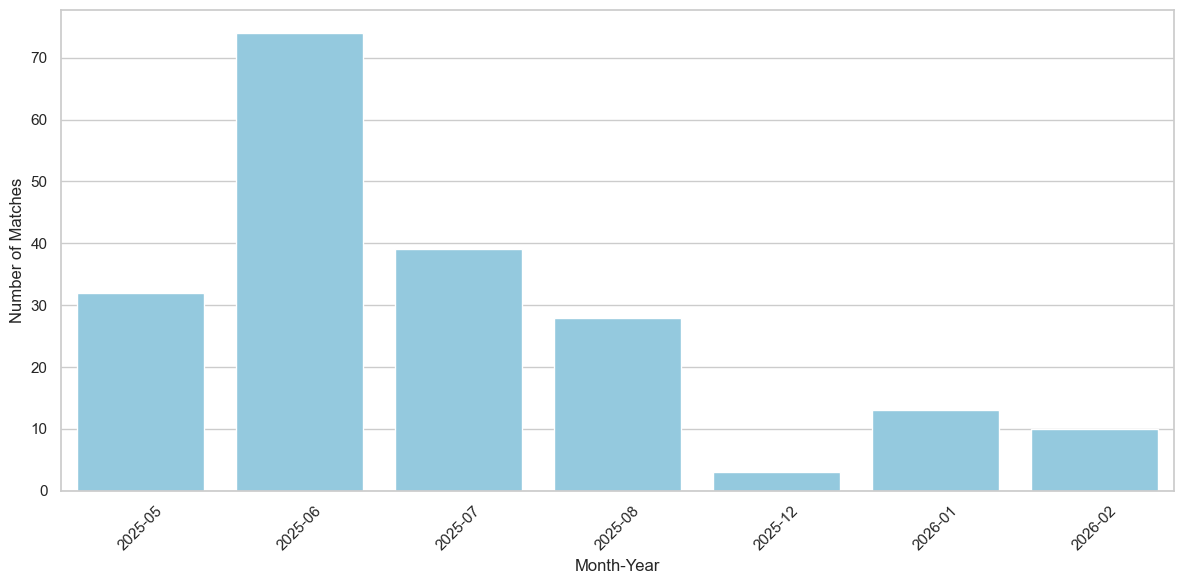

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is already loaded and preprocessed
df['date'] = pd.to_datetime(df['date'])  # ensure date is datetime type

# Create a column for month-year for aggregation
df['month_year'] = df['date'].dt.to_period('M')

# Aggregate number of matches per month
matches_per_month = df.groupby('month_year').size().reset_index(name='match_count')

# Convert month_year back to string for plotting
matches_per_month['month_year'] = matches_per_month['month_year'].astype(str)

# Plot using Seaborn
plt.figure(figsize=(12,6))
sns.barplot(x='month_year', y='match_count', data=matches_per_month, color='skyblue')
plt.xticks(rotation=45)

plt.xlabel('Month-Year')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()

In [7]:
# Select only numeric columns
numeric_cols = df_numerical.columns

# Compute descriptive statistics
stats_table = df_numerical.agg(['mean','median','std','min','max']).T
stats_table['range'] = stats_table['max'] - stats_table['min']

# Compute skewness and kurtosis
stats_table['skewness'] = df_numerical[numeric_cols].skew()
stats_table['kurtosis'] = df_numerical[numeric_cols].kurtosis()

# Keep only relevant columns
stats_table = stats_table[['mean','median','std','range','skewness','kurtosis']].round(2)

stats_table

,mean,median,std,range,skewness,kurtosis
kills,8.97,9.0,5.51,25.0,0.78,0.44
deaths,8.56,8.0,3.58,20.0,0.33,-0.08
assists,18.29,18.0,8.61,51.0,0.44,0.39
last_hits,198.10,190.0,122.98,787.0,1.43,3.81
denies,9.21,8.0,6.68,33.0,1.12,1.33
duration_minutes,44.98,43.5,10.13,63.8,0.78,1.10
gold_per_min,476.31,462.0,132.69,753.0,0.26,-0.06
xp_per_min,692.68,668.0,228.15,1192.0,0.27,-0.18
hero_damage,33039.49,30022.0,16420.91,83189.0,0.66,0.15
tower_damage,2674.89,1190.0,3570.45,19962.0,2.06,4.52


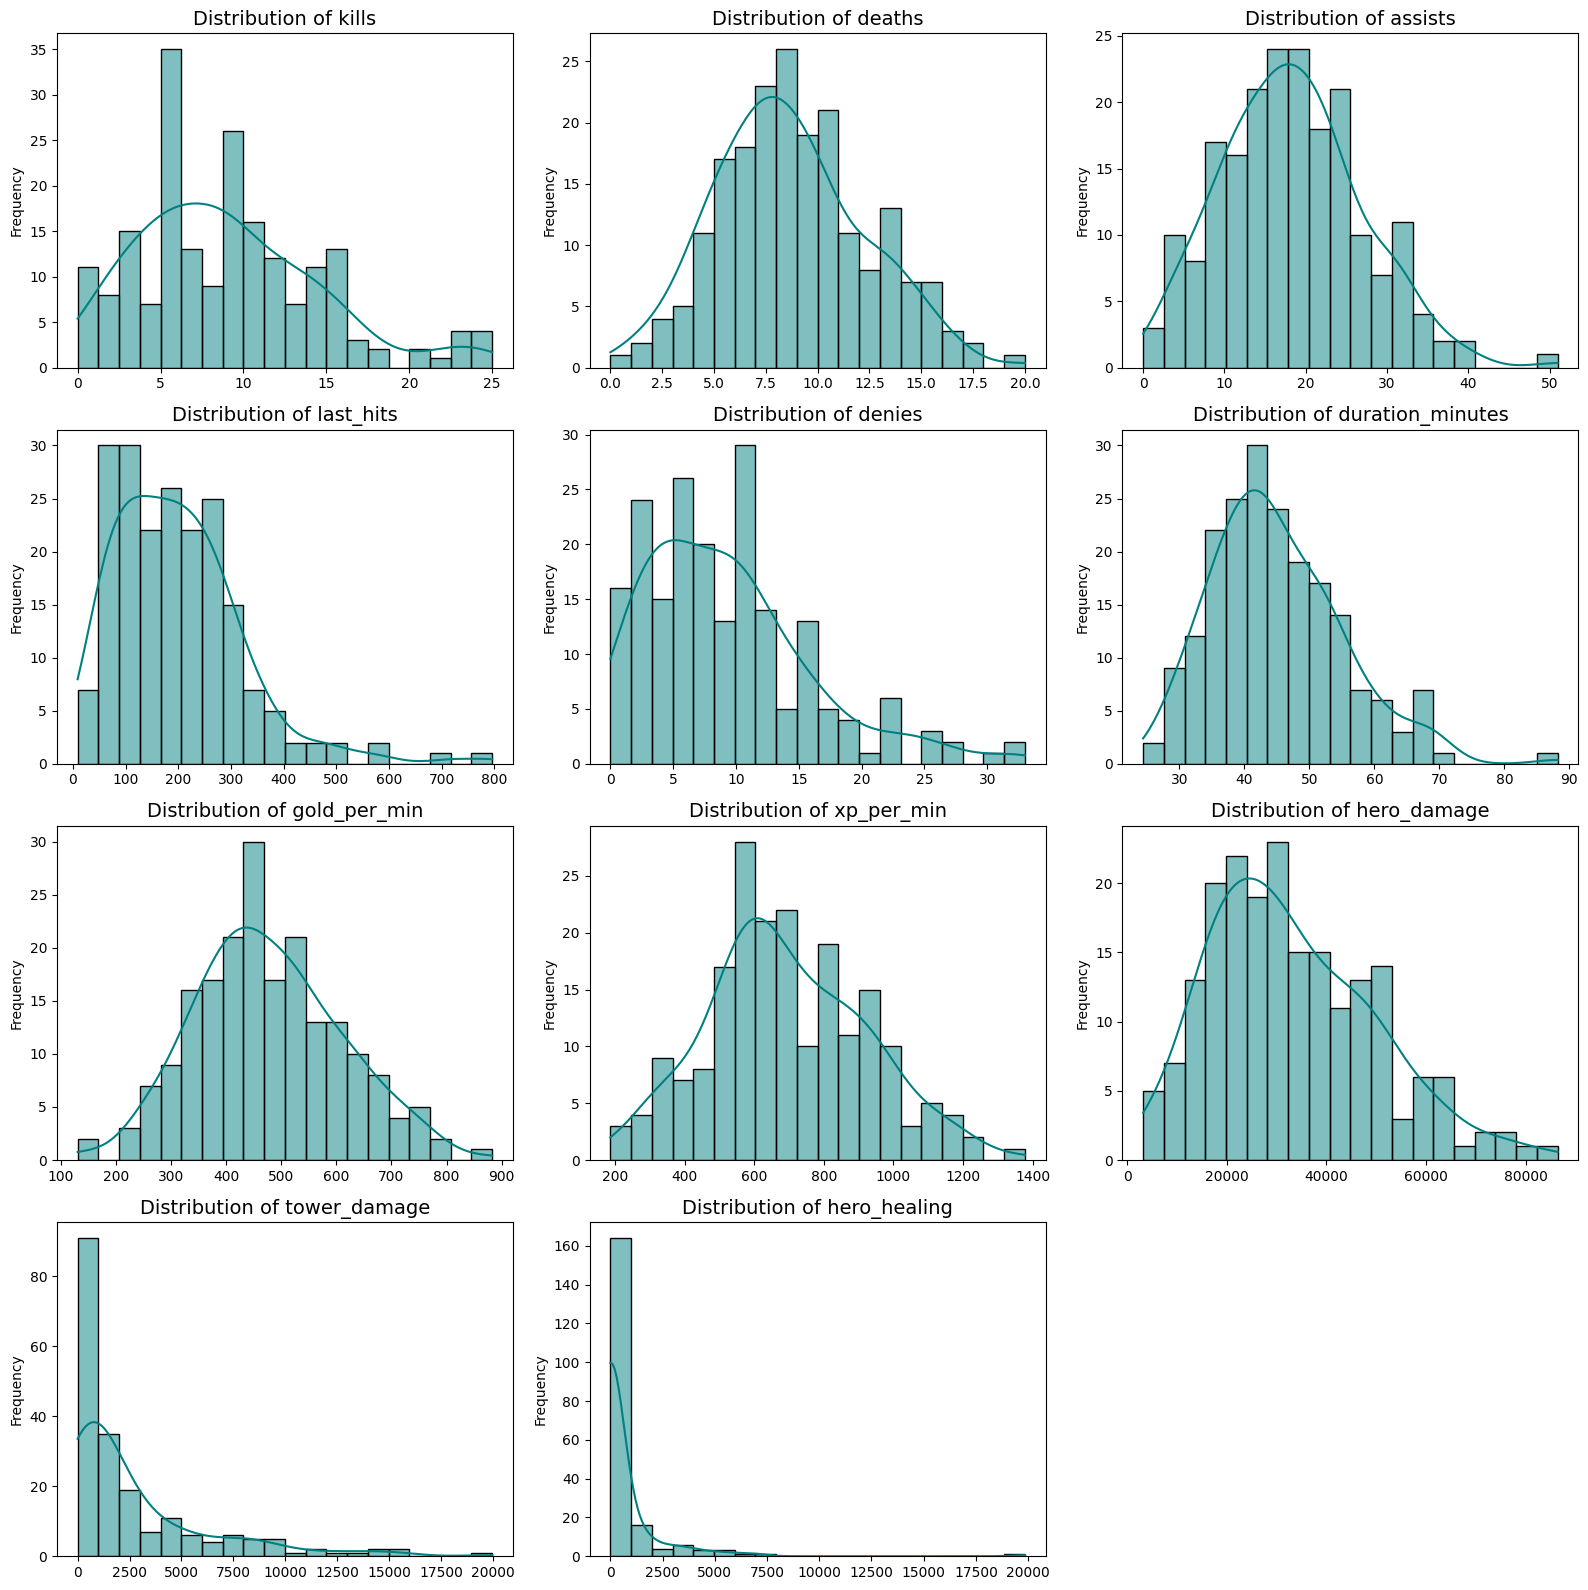

            kills      deaths     assists   last_hits     denies  \
count  199.000000  199.000000  199.000000  199.000000  199.00000   
mean     8.974874    8.557789   18.286432  198.100503    9.20603   
std      5.511638    3.582424    8.608979  122.977209    6.67823   
min      0.000000    0.000000    0.000000    9.000000    0.00000   
25%      5.000000    6.000000   12.000000  107.500000    4.00000   
50%      9.000000    8.000000   18.000000  190.000000    8.00000   
75%     12.000000   11.000000   23.500000  261.000000   12.00000   
max     25.000000   20.000000   51.000000  796.000000   33.00000   

       duration_minutes  gold_per_min   xp_per_min   hero_damage  \
count        199.000000    199.000000   199.000000    199.000000   
mean          44.975377    476.306533   692.683417  33039.492462   
std           10.134482    132.693356   228.147979  16420.912312   
min           24.400000    130.000000   186.000000   3205.000000   
25%           38.200000    387.500000   550.000

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data


# 2. Filter for numeric columns only (Kills, Deaths, GPM, etc.)
# We exclude 'match_id' and 'hero_id' because their distributions aren't meaningful
numeric_cols = df_numerical.columns
cols_to_plot = [col for col in numeric_cols if 'id' not in col.lower()]

# 3. Create the grid
num_plots = len(cols_to_plot)
rows = (num_plots + 2) // 3  # Arrange in 3 columns
fig, axes = plt.subplots(rows, 3, figsize=(16, 4 * rows))
axes = axes.flatten()

# 4. Loop through and plot
for i, col in enumerate(cols_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i], color='teal', bins=20)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots in the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 5. Display the raw numbers (Mean, Std Dev, Min, Max)
print(df[cols_to_plot].describe())

Winning Factors

In [9]:
import pandas as pd
from scipy.stats import pearsonr

# Ensure binary target
if df['won'].dtype == 'bool' or df['won'].dtype == 'object':
    df['won'] = df['won'].astype(int)

# Select numeric columns
numeric_df = df.select_dtypes(include=['number']).drop(
    columns=[col for col in df.columns if 'id' in col.lower()], errors='ignore'
)

results = []

for col in numeric_df.columns:
    if col != 'won':
        r, p = pearsonr(numeric_df[col], numeric_df['won'])
        results.append([col, r, p])

corr_table = pd.DataFrame(results, columns=['Variable','r','p'])

# significance symbols
def sig(p):
    if p < 0.001: return '***'
    if p < 0.01: return '**'
    if p < 0.05: return '*'
    return 'ns'

corr_table['Sig'] = corr_table['p'].apply(sig)

# sort strongest to weakest
corr_table = corr_table.sort_values(by='r', ascending=False)

corr_table.round(4)

,Variable,r,p,Sig
2,assists,0.4426,0.0000,***
9,tower_damage,0.4245,0.0000,***
7,xp_per_min,0.3860,0.0000,***
6,gold_per_min,0.3765,0.0000,***
0,kills,0.3338,0.0000,***
8,hero_damage,0.1363,0.0549,ns
10,hero_healing,0.0899,0.2068,ns
5,duration_minutes,0.0201,0.7777,ns
3,last_hits,-0.0096,0.8925,ns
4,denies,-0.0583,0.4138,ns


C:\Users\Migs\AppData\Local\Temp\ipykernel_20824\1892229888.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette=colors)


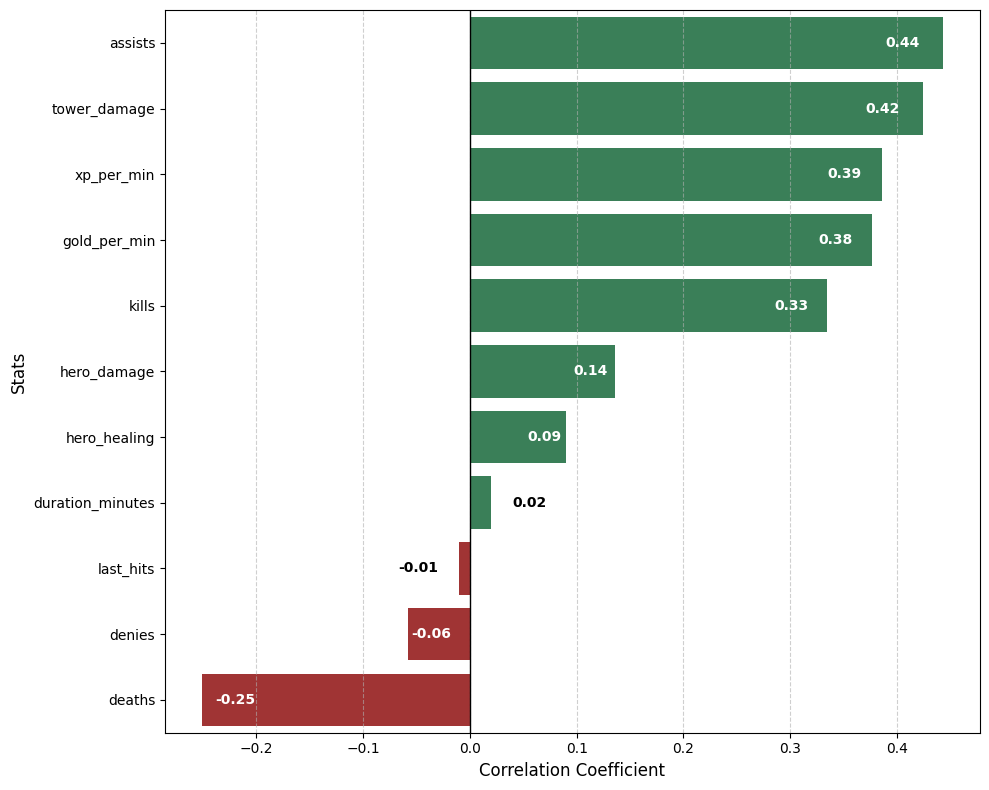

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure 'won' is numeric (1 for Win, 0 for Loss)
if df['won'].dtype == 'bool' or df['won'].dtype == 'object':
    df['won'] = df['won'].astype(int)

# 2. Calculate correlation of all numeric columns with 'won'
numeric_df = df.select_dtypes(include=['number']).drop(
    columns=[col for col in df.columns if 'id' in col.lower()], errors='ignore'
)
correlations = numeric_df.corr()['won'].drop('won').sort_values(ascending=False).round(3)

# 3. Plotting horizontal bar chart with values
plt.figure(figsize=(10, 8))
colors = ['seagreen' if x > 0 else 'firebrick' for x in correlations]
sns.barplot(x=correlations.values, y=correlations.index, palette=colors)

# Annotate each bar, handle near-zero bars
for i, v in enumerate(correlations.values):
    # Threshold to decide if text should be inside or outside the bar
    if abs(v) >= 0.05:  # if correlation is big enough, put inside
        ha = 'right' if v > 0 else 'left'
        x_pos = v * 0.95  # slightly inside
        plt.text(x_pos, i, f"{v:.2f}", va='center', ha=ha, color='white', fontweight='bold')
    else:
        # for very small correlations, put text just outside the bar
        ha = 'left' if v > 0 else 'right'
        x_pos = v + 0.02 if v > 0 else v - 0.02
        plt.text(x_pos, i, f"{v:.2f}", va='center', ha=ha, color='black', fontweight='bold')


plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Stats', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('win_correlation.png', dpi=300)
plt.show()

impact or consistency

In [11]:
import pandas as pd

metrics = ['assists','tower_damage','xp_per_min','gold_per_min','kills']

consistency = pd.DataFrame({
    'Mean': df[metrics].mean(),
    'SD': df[metrics].std(),
    'CV': (df[metrics].std() / df[metrics].mean())
})

consistency

,Mean,SD,CV
assists,18.286432,8.608979,0.470785
tower_damage,2674.889447,3570.445177,1.334801
xp_per_min,692.683417,228.147979,0.329368
gold_per_min,476.306533,132.693356,0.278588
kills,8.974874,5.511638,0.614119


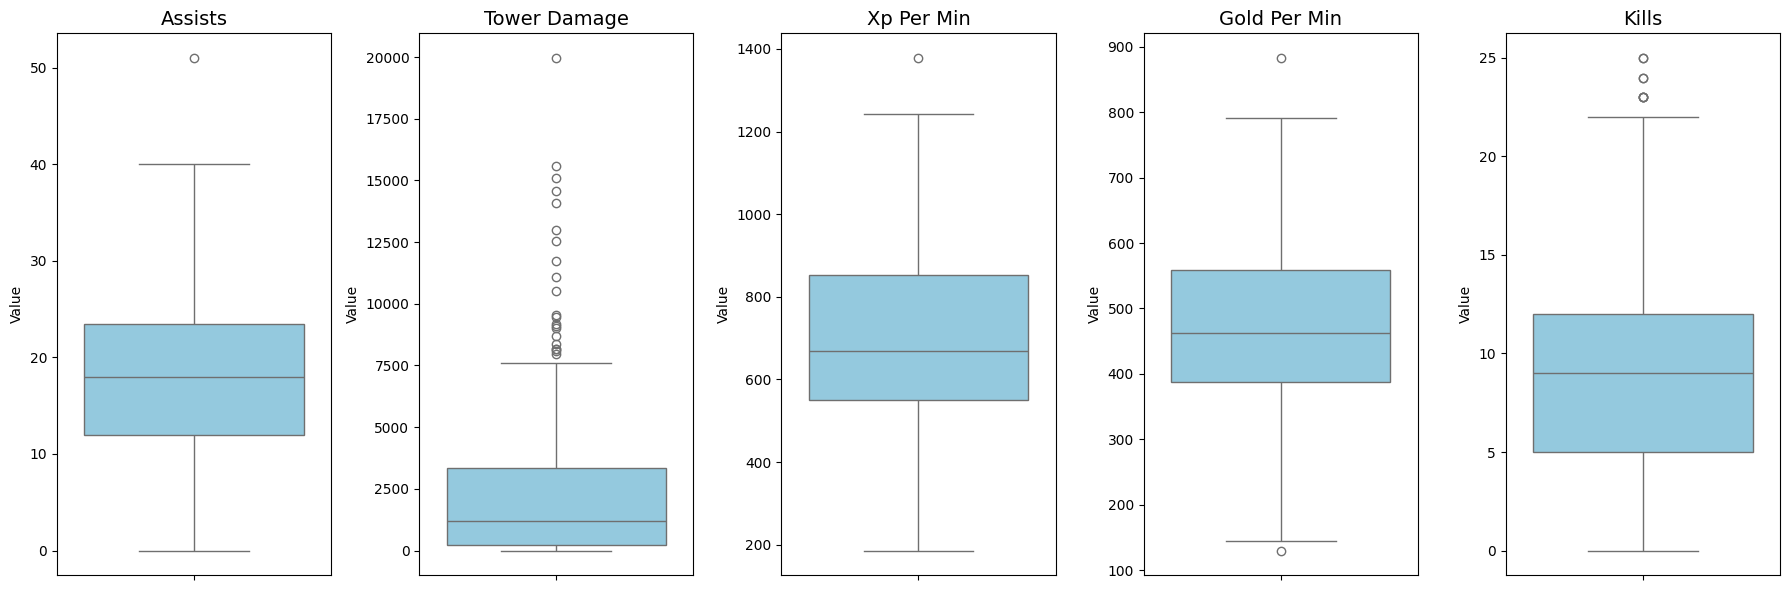

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'metrics' are defined as follows:
metrics = ['assists', 'tower_damage', 'xp_per_min', 'gold_per_min', 'kills']

# Create subplots for each metric to handle different scales
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))

for i, metric in enumerate(metrics):
    sns.boxplot(y=df[metric], ax=axes[i], color='skyblue')
    axes[i].set_title(metric.replace('_', ' ').title(), fontsize=14)
    axes[i].set_ylabel('Value')
    axes[i].set_xlabel('')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

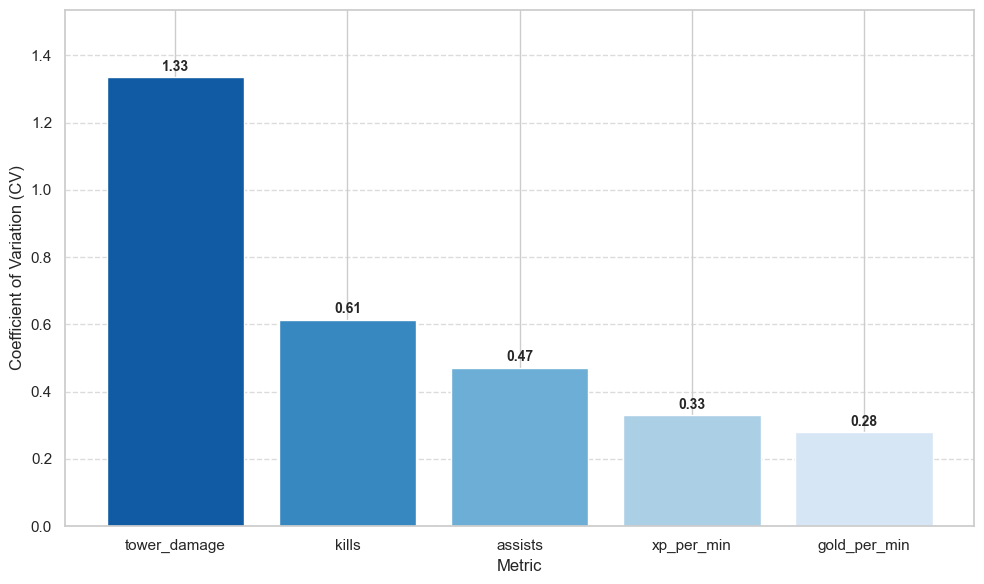

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics and CV calculation
metrics = ['assists','tower_damage','xp_per_min','gold_per_min','kills']
cv = df[metrics].std() / df[metrics].mean()
cv = cv.sort_values(ascending=False)

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(cv.index, cv.values, color=sns.color_palette("Blues_r", len(cv)))

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title
plt.ylabel('Coefficient of Variation (CV)', fontsize=12)
plt.xlabel('Metric', fontsize=12)

plt.ylim(0, max(cv.values) + 0.2)  # Add space for labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Optimal Hero Selection for Dota 2

C:\Users\Migs\AppData\Local\Temp\ipykernel_20824\967311204.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.index, y=top_5['win_rate'], palette="viridis")


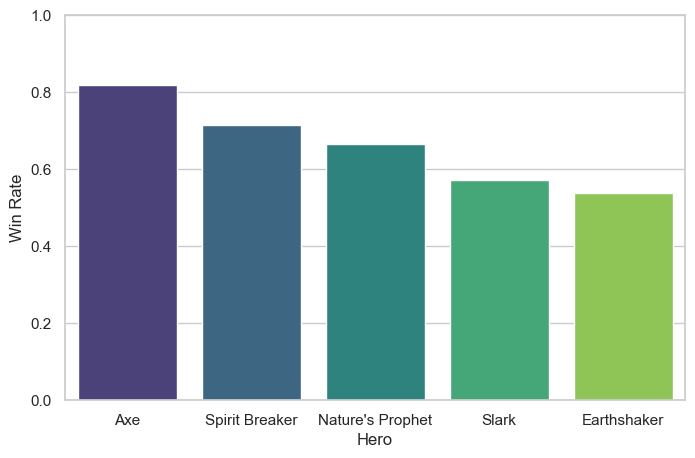

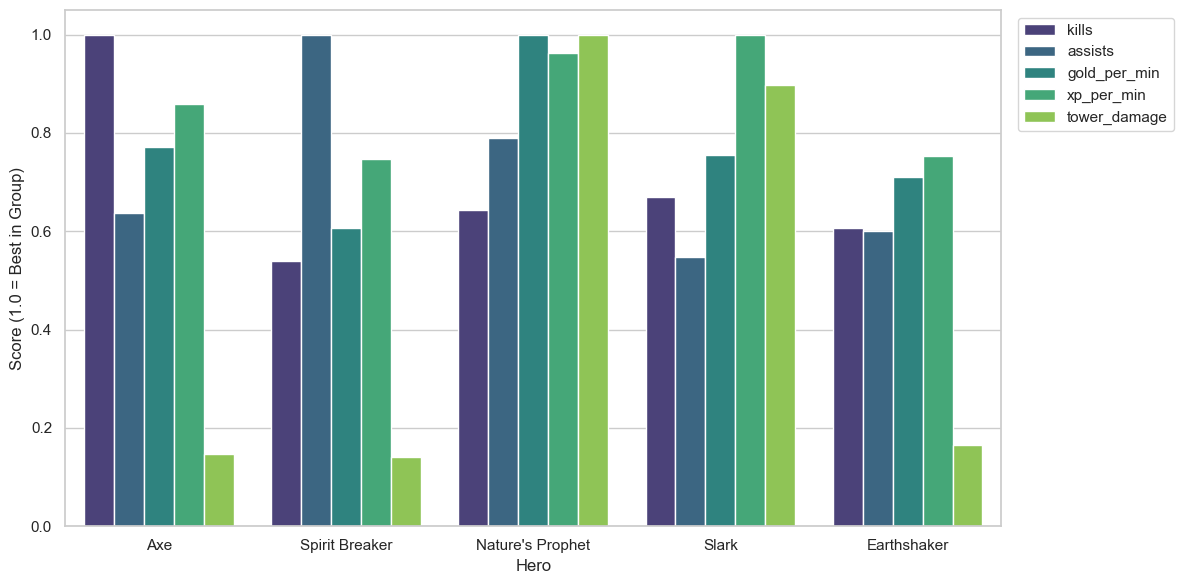

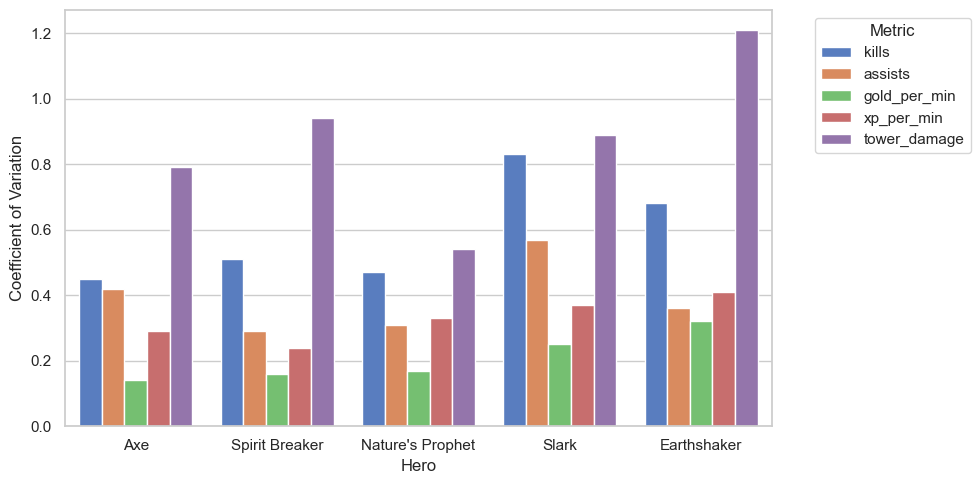

In [14]:

# Step 1: compute basic stats
hero_stats = df.groupby('hero_name')['won'].agg(['mean','count']).rename(columns={'mean':'win_rate','count':'matches'})

# Step 2: first filter by minimum matches
hero_stats_filtered = hero_stats[hero_stats['matches'] >= 5].copy()

# Step 3: compute SE only on filtered heroes
hero_stats_filtered['SE'] = (hero_stats_filtered['win_rate'] * (1 - hero_stats_filtered['win_rate']) / hero_stats_filtered['matches']) ** 0.5

# Step 4: optional further filter by SE if desired
heroes_to_use = hero_stats_filtered[hero_stats_filtered['SE'] <= 0.2].index

# Step 5: filter the main df
df_filtered = df[df['hero_name'].isin(heroes_to_use)]

# Filter stats, perf, and CV consistently
metrics = ['kills','assists','gold_per_min','xp_per_min','tower_damage']

# Only use heroes_to_use
df_filtered = df[df['hero_name'].isin(heroes_to_use)]

# Recompute all stats from df_filtered
hero_stats_filtered = df_filtered.groupby('hero_name')['won'].agg(['mean','count']).rename(columns={'mean':'win_rate','count':'matches'})
hero_stats_filtered['SE'] = (hero_stats_filtered['win_rate'] * (1 - hero_stats_filtered['win_rate']) / hero_stats_filtered['matches']) ** 0.5

hero_perf = df_filtered.groupby('hero_name')[metrics].mean().round(2)
hero_cv = (df_filtered.groupby('hero_name')[metrics].std() / df_filtered.groupby('hero_name')[metrics].mean()).round(2)
hero_cv.columns = [col + '_CV' for col in hero_cv.columns]

# Now join safely
hero_summary = hero_stats_filtered.join(hero_perf).join(hero_cv)

hero_summary.head()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set(style="whitegrid")

# ---------- Step 1: Top 5 heroes by win rate ----------
top_5 = hero_summary.sort_values(by='win_rate', ascending=False).head(5)

# ---------- Chart 1: Top 5 Heroes by Win Rate ----------
plt.figure(figsize=(8,5))
sns.barplot(x=top_5.index, y=top_5['win_rate'], palette="viridis")

plt.ylabel("Win Rate")
plt.ylim(0, 1)
plt.xlabel("Hero")
plt.show()

# ---------- Chart 2: Normalized Performance Metrics per Hero ----------
metrics = ['kills','assists','gold_per_min','xp_per_min','tower_damage']

# Normalize per hero (row-wise) to avoid domination by one metric
top_5_perf_norm = top_5[metrics] / top_5[metrics].max()

# Melt for Seaborn
df_perf_melt = top_5_perf_norm.reset_index().melt(
    id_vars='hero_name',
    value_vars=metrics,
    var_name='Metric',
    value_name='Relative Score'
)


plt.figure(figsize=(12,6))
sns.barplot(
    data=df_perf_melt,
    x='hero_name',
    y='Relative Score',
    hue='Metric',
    palette='viridis'
)


plt.ylabel("Score (1.0 = Best in Group)")
plt.xlabel("Hero")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ---------- Chart 3: Performance Consistency (CV) ----------
cv_metrics = [m+'_CV' for m in metrics]
top_5_cv = top_5[cv_metrics]

# Melt for Seaborn
df_cv_melt = top_5_cv.reset_index().melt(id_vars='hero_name', value_vars=cv_metrics,
                                         var_name='Metric', value_name='CV')
# Clean metric names
df_cv_melt['Metric'] = df_cv_melt['Metric'].str.replace('_CV','')

plt.figure(figsize=(10,5))
sns.barplot(data=df_cv_melt, x='hero_name', y='CV', hue='Metric', palette='muted')

plt.ylabel("Coefficient of Variation")
plt.xlabel("Hero")
plt.xticks(rotation=0)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Side Diffrence

Win Rates by Side:
          win_rate  matches
team                      
Dire     0.396226      106
Radiant  0.569892       93

Chi-Square Test Results:
P-Value: 0.02117
RESULT: Statistically Significant! One side has a distinct advantage.


C:\Users\Migs\AppData\Local\Temp\ipykernel_20824\2554846104.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


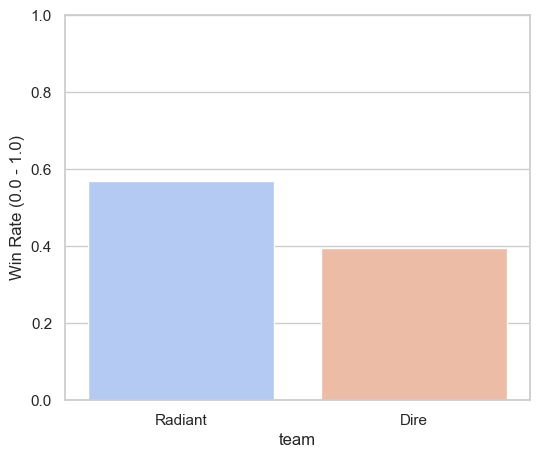

In [26]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Calculate Win Rates ---
# We group by your existing 'team' column
side_stats = df.groupby('team')['won'].agg(['mean', 'count']).rename(columns={'mean': 'win_rate', 'count': 'matches'})
print("Win Rates by Side:\n", side_stats)

# --- Step 2: Statistical Significance (Chi-Square Test) ---
# Create a "Contingency Table" of Side vs Outcome (Won/Lost)
contingency_table = pd.crosstab(df['team'], df['won'])

# Run the test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-Square Test Results:")
print(f"P-Value: {p_value:.5f}")

if p_value < 0.05:
    print("RESULT: Statistically Significant! One side has a distinct advantage.")
else:
    print("RESULT: No significant advantage. The map is balanced.")

# --- Visualization: Win Rate with Confidence Intervals ---
plt.figure(figsize=(6, 5))

# Seaborn will automatically calculate the error bars (Confidence Interval)
sns.barplot(
    data=df,
    x='team',
    y='won',
    palette='coolwarm',
    capsize=0.1,
    order=['Radiant', 'Dire'], # Optional: Ensures consistent order
    errorbar=None
)


plt.ylabel('Win Rate (0.0 - 1.0)')
plt.ylim(0, 1) # Keep y-axis 0-1 for clarity
plt.show()

C:\Users\Migs\AppData\Local\Temp\ipykernel_20824\2170829430.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Migs\AppData\Local\Temp\ipykernel_20824\2170829430.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Migs\AppData\Local\Temp\ipykernel_20824\2170829430.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Migs\AppData\Local\Temp\ipykernel_20824\2170829430.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

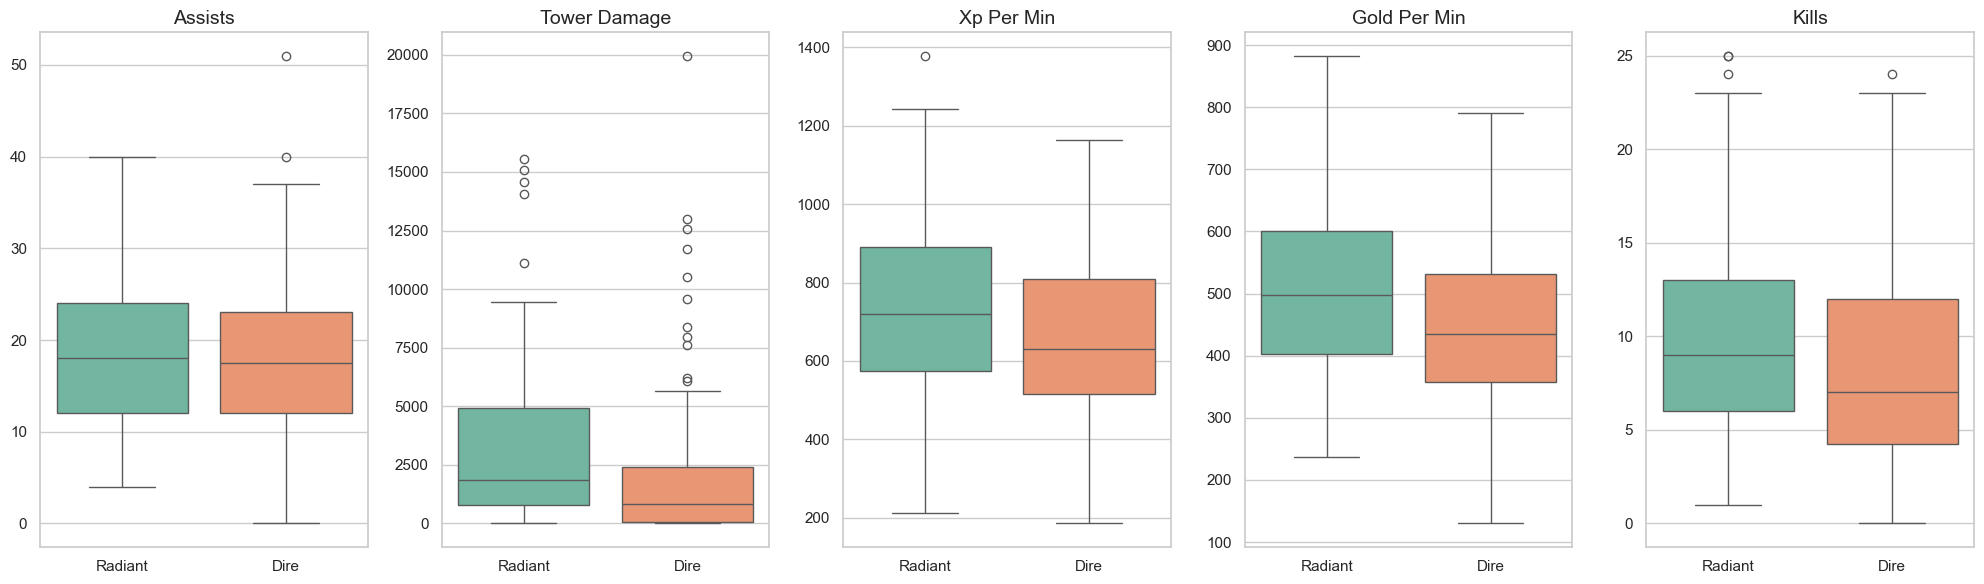

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics to compare
metrics = ['assists', 'tower_damage', 'xp_per_min', 'gold_per_min', 'kills']

# Create a layout with 1 Row and 5 Columns
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

for i, metric in enumerate(metrics):
    sns.boxplot(
        data=df, 
        x='team',        # Split by team (Radiant vs Dire)
        y=metric,        # The metric to measure
        palette='Set2',  # Color scheme
        ax=axes[i],      # Place in specific subplot
        order=['Radiant', 'Dire'] # Ensure consistent order
    )
    
    # Clean up titles and labels
    axes[i].set_title(metric.replace('_', ' ').title(), fontsize=14)
    axes[i].set_ylabel('') # Remove y-label to save space
    axes[i].set_xlabel('') # Remove 'team' label since it's obvious

plt.tight_layout()
plt.show()

In [24]:
from scipy.stats import ttest_ind, mannwhitneyu

# Define metrics
metrics = ['assists', 'tower_damage', 'xp_per_min', 'gold_per_min', 'kills']

sig_results = []

for metric in metrics:
    radiant_data = df[df['team'] == 'Radiant'][metric]
    dire_data = df[df['team'] == 'Dire'][metric]
    
    # Using Mann-Whitney U because Dota stats (like Tower Damage) are often non-normal
    stat, p = mannwhitneyu(radiant_data, dire_data)
    
    sig_results.append({
        'Metric': metric,
        'Radiant Mean': radiant_data.mean(),
        'Dire Mean': dire_data.mean(),
        'p-value': p,
        'Significant': 'Yes' if p < 0.05 else 'No'
    })

# Display results
sig_df = pd.DataFrame(sig_results)
print(sig_df.round(4))

         Metric  Radiant Mean  Dire Mean  p-value Significant
0       assists       18.7204    17.9057   0.6171          No
1  tower_damage     3386.1613  2050.8491   0.0000         Yes
2    xp_per_min      738.4624   652.5189   0.0166         Yes
3  gold_per_min      505.0215   451.1132   0.0043         Yes
4         kills        9.8925     8.1698   0.0208         Yes


Performance on duration

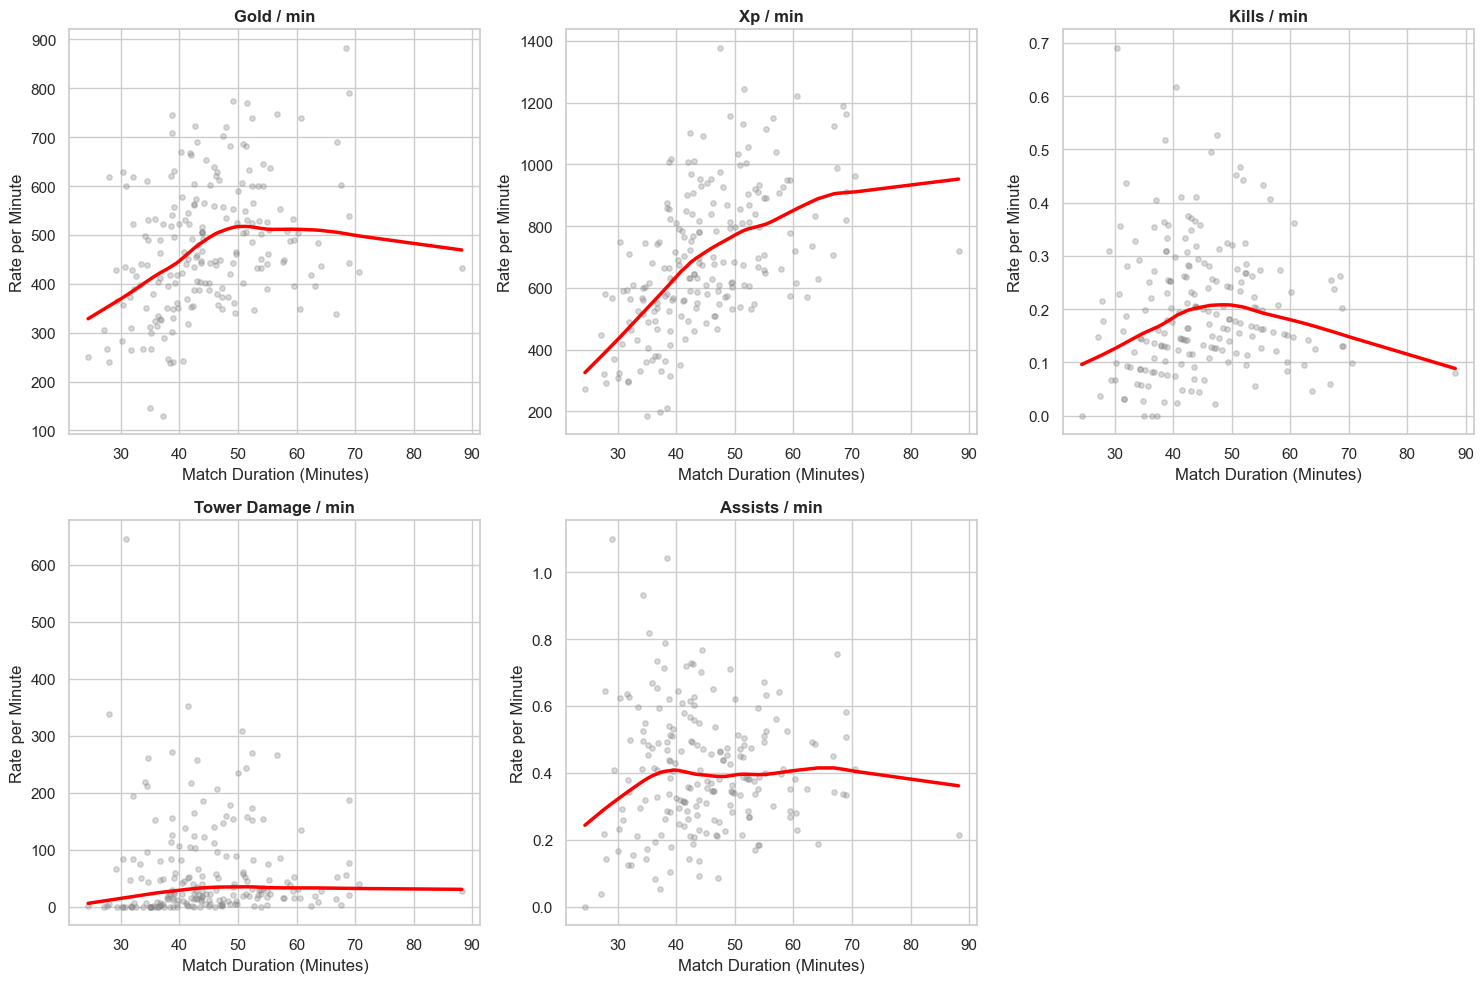

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Normalize 'Totals' to 'Rates' ---
df['kills_per_min'] = df['kills'] / df['duration_minutes']
df['tower_damage_per_min'] = df['tower_damage'] / df['duration_minutes']
df['assists_per_min'] = df['assists'] / df['duration_minutes']

# --- Step 2: Use the CONSISTENT metrics list ---
metrics = ['gold_per_min', 'xp_per_min', 'kills_per_min', 'tower_damage_per_min', 'assists_per_min']

# --- Step 3: Plotting ---
# Create 6 slots (2x3) to fit 5 metrics
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

sns.set_style("whitegrid")

for i, metric in enumerate(metrics):
    sns.regplot(
        data=df, 
        x='duration_minutes', 
        y=metric, 
        ax=axes[i],
        lowess=True, # Draws the "Smoothed" trend line
        scatter_kws={'alpha': 0.3, 's': 15, 'color': 'gray'},
        line_kws={'color': 'red', 'linewidth': 2.5}
    )
    
    # Clean up the titles (e.g., "Kills Per Min" instead of "kills_per_min")
    readable_name = metric.replace('_', ' ').title().replace('Per Min', '/ min')
    axes[i].set_title(readable_name, fontsize=12, fontweight='bold')
    axes[i].set_xlabel("Match Duration (Minutes)")
    axes[i].set_ylabel("Rate per Minute")

# --- THE FIX: Hide the 6th empty subplot ---
axes[5].axis('off')

plt.tight_layout()
plt.show()

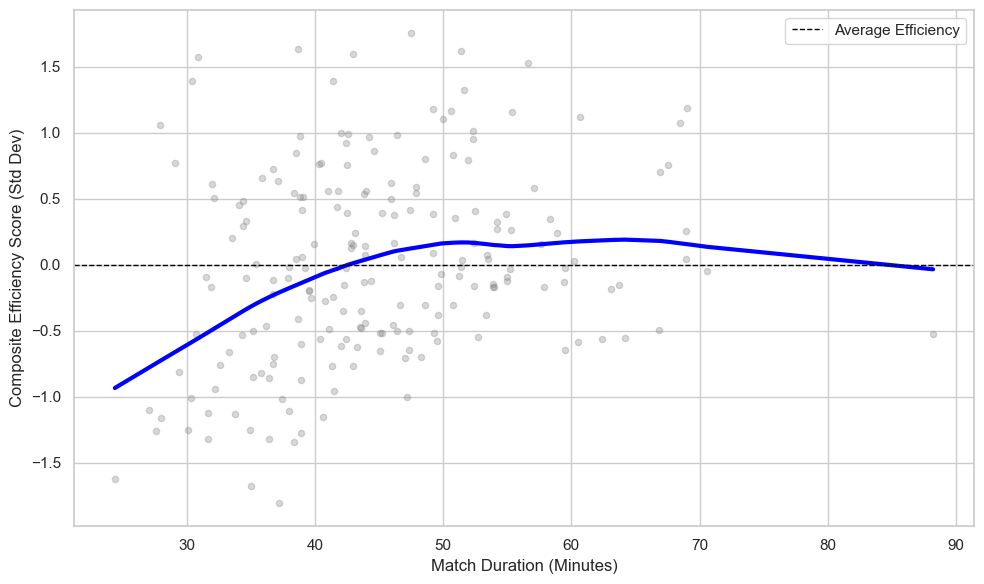

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Define the metrics that represent "Efficiency"
features = ['gold_per_min', 'xp_per_min', 'kills_per_min', 'tower_damage_per_min', 'assists_per_min']

# 2. Standardize them (Z-Score Normalization)
# This makes them comparable. A score of +1 means "1 Standard Deviation above average".
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# 3. Create the Composite Score
# We take the mean of all standardized metrics for each match.
# This represents your "Total Output Intensity" for that game.
df['efficiency_index'] = df_scaled[features].mean(axis=1)

# 4. Plot the Single "Efficiency Curve"
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Regression with LOESS (Curve)
sns.regplot(
    data=df, 
    x='duration_minutes', 
    y='efficiency_index', 
    lowess=True, 
    scatter_kws={'alpha': 0.3, 'color': 'gray', 's': 20},
    line_kws={'color': 'blue', 'linewidth': 3}
)

# Add a reference line at 0 (Average Performance)
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Average Efficiency')


plt.xlabel('Match Duration (Minutes)')
plt.ylabel('Composite Efficiency Score (Std Dev)')
plt.legend()
plt.tight_layout()
plt.show()

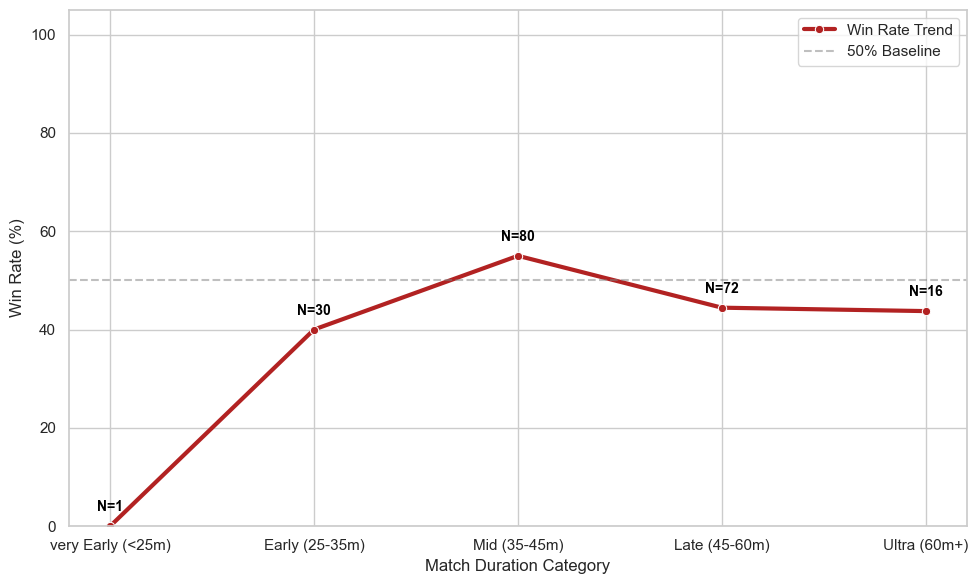

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Safe Duration Handling ---
# We check if 'duration_minutes' already exists to avoid the KeyError
if 'duration_minutes' not in df.columns:
    if 'duration' in df.columns:
        # If 'duration' exists, create 'duration_minutes'
        # Assuming raw 'duration' is in seconds if max > 500
        df['duration_minutes'] = df['duration'] / 60 if df['duration'].max() > 500 else df['duration']
    else:
        # If neither exists, stop and print available columns
        print("ERROR: Could not find 'duration' or 'duration_minutes'.")
        print("Your available columns are:", df.columns.tolist())
        # Stop execution here if this happens

# --- Step 2: Create Duration Bins ---
# Now we are guaranteed to have 'duration_minutes'
bins = [0, 25, 35, 45, 60, 120]
labels = ['very Early (<25m)', 'Early (25-35m)', 'Mid (35-45m)', 'Late (45-60m)', 'Ultra (60m+)']

df['duration_category'] = pd.cut(df['duration_minutes'], bins=bins, labels=labels)

# --- Step 3: Calculate Win Rate AND Count (Sample Size) ---
# Group by the new category
summary = df.groupby('duration_category')['won'].agg(['mean', 'count'])
summary['win_rate'] = summary['mean'] * 100

# --- Step 4: Plot ---
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Draw the line
sns.lineplot(
    data=summary,
    x=summary.index, 
    y='win_rate', 
    marker='o', 
    color='firebrick', 
    linewidth=3,
    label='Win Rate Trend'
)

# Add 50% Baseline
plt.axhline(50, color='gray', linestyle='--', alpha=0.5, label='50% Baseline')

# 5. Annotation Loop (Sample Size N)
for i, category in enumerate(summary.index):
    count = summary.loc[category, 'count']
    rate = summary.loc[category, 'win_rate']
    
    # Only annotate valid points
    if count > 0:
        plt.text(
            x=i, 
            y=rate + 3, # Shift text slightly up
            s=f"N={count}", 
            ha='center', 
            fontsize=10, 
            fontweight='bold',
            color='black'
        )

plt.ylabel('Win Rate (%)')
plt.xlabel('Match Duration Category')
plt.ylim(0, 105) 
plt.legend()
plt.tight_layout()
plt.show()